In [ ]:
pip install ydata_profiling

#**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport  #it's for running ProfileReport() methodS

#Note : numpy is a module used for data manipulation and numerical calculations.
#pandas is used to easily manage and analyze structured data like tables.
#seaborn is a visualization module used to display data in graphs and charts.
#matplotlib.pyplot is used to create various kinds of plots and charts.
# Import the ProfileReport class from the ydata_profiling library. This is used to generate an automated Exploratory Data Analysis (EDA) report for a pandas DataFrame

#**Load the CSV file 'NetflixOriginals.csv' from the given path using pandas**
#**The 'ISO-8859-1' encoding is specified to correctly read special characters in the file**

In [ ]:
path = "/content/NetflixOriginals.csv"
df = pd.read_csv(path, encoding='ISO-8859-1') #Read the CSV file using 'ISO-8859-1' encoding to avoid Unicode decoding errors

#**Data Profiling**

In [ ]:
profile = ProfileReport(df, title="Netflix Original Films and IMDB Scores Dataset", explorative=True)
display(profile)


#Note: # Generate an automated Exploratory Data Analysis (EDA) report using pandas_profiling
# This report provides insights like missing values, correlations, data types, and visualizations
# Display a concise summary of the dataset
# Includes column names, number of non-null entries, and data types
# Display the first 5 rows of the dataset
# Useful for quickly understanding the structure and content of the dataset
# Generate descriptive statistics for numerical columns
# Includes metrics such as count, mean, standard deviation, min, max, and quartiles# Show frequency of unique row combinations in the entire DataFrame
# (Usually better to use this on specific columns to understand category distributions)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:00<00:00, 13.32it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Creating a copy
df_copy = df.copy ()


In [ ]:
#check columns, data types, and non-null counts.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [ ]:
#df.head() method le first 5 rows lai print garxa
df_copy.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
# df.describe() for numerical feature statistics(mean,median,mode)
df_copy.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


#**Data Quality Checks**

In [ ]:
#categorical feature distributions ko lagi use gareko
df_copy.value_counts()  #row ko unique value lai count garxa

,,,,,,count
Title,Genre,Premiere,Runtime,IMDB Score,Language,
Òlòt?ré,Crime drama,"October 2, 2020",106,5.5,English,1
#REALITYHIGH,Comedy,"September 8, 2017",99,5.2,English,1
13th,Documentary,"October 7, 2016",100,8.2,English,1
13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,"January 26, 2017",36,7.1,English,1
15 August,Comedy-drama,"March 29, 2019",124,5.8,Marathi,1
...,...,...,...,...,...,...
A California Christmas,Romantic comedy,"December 14, 2020",107,5.8,English,1
A Babysitter's Guide to Monster Hunting,Comedy/Fantasy/Family,"October 15, 2020",98,5.4,English,1
A 3 Minute Hug,Documentary,"October 28, 2019",28,6.5,English/Spanish,1


In [ ]:
#missing value list
df.isnull().sum()

#Data Cleaning
df_copy["Genre"].fillna(df_copy["Genre"].mode()[0], inplace=True)  #It fills all missing values (NaN) in the "Genre"
#column of the DataFrame df_copy with the most frequent (mode) value found in that column

#Dropping column named "Runtime" due to the missing value in maximum number of rows
df_copy.drop(columns = 'Runtime', inplace=True)  #Replaces all NaN values in-place permantly



<ipython-input-16-3bdca8ef191e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["Genre"].fillna(df_copy["Genre"].mode()[0], inplace=True)


In [ ]:
df_copy.drop_duplicates(inplace = True)
df_copy.duplicated().sum()

np.int64(0)

In [ ]:
df_copy

,Title,Genre,Premiere,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",3.4,Hindi
...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",8.6,Portuguese


In [ ]:
#df.nunique()` counts the **number of unique (non-duplicate) values** in **each column** of the DataFrame `df`.
print("Unique Values:\n",df.nunique())

#Sums up the total number of unique values across all columns.
print("\nTotal Unique Values:",df.nunique().sum())

#how many times each unique value appears** in the `"Title"` column.
print("\nValues in Legendary Column:\n",df["Title"].value_counts())


#Null Values
#Checking for null value
print("List of null values:\n",df.isnull().sum())


# First sum Counts how many True values (i.e., missing values) are in each column.
#Second .sum() Adds up the null counts across all columns, giving the total number of missing values in the entire dataset.
print("\nTotal null values:",df.isnull().sum().sum())


Unique Values:
 Title         584
Genre         115
Premiere      390
Runtime       124
IMDB Score     54
Language       38
dtype: int64

Total Unique Values: 1305

Values in Legendary Column:
 Title
David Attenborough: A Life on Our Planet    1
Enter the Anime                             1
Dark Forces                                 1
The App                                     1
The Open House                              1
                                           ..
Whipped                                     1
The Call                                    1
Searching for Sheela                        1
Sardar Ka Grandson                          1
Paradox                                     1
Name: count, Length: 584, dtype: int64
List of null values:
 Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

Total null values: 0


In [ ]:
#Changing datatype of Lamguage to categorical
print("Before:\n\n",df.dtypes)

#Converts the data type of "Language" from object (i.e., string) to category.
df_copy["Language"]=df["Language"].astype("category")
print("\n\nAfter\n\n",df_copy.dtypes)

Before:

 Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object


After

 Title           object
Genre           object
Premiere        object
IMDB Score     float64
Language      category
Runtime       category
dtype: object


#**Visualization**

In [ ]:

# Count of movies in each Genre
plt.figure(figsize=(12, 6))
sns.countplot(x='Language', data=df)
plt.title("Movie Count per Genre")

#plt.xticks(rotation=45): Rotates the x-axis labels (genre names) so they don't overlap.
plt.xticks(rotation=90)  #Rotate x-axis labels by 45 degrees for better readability
plt.show()


NameError: name 'plt' is not defined

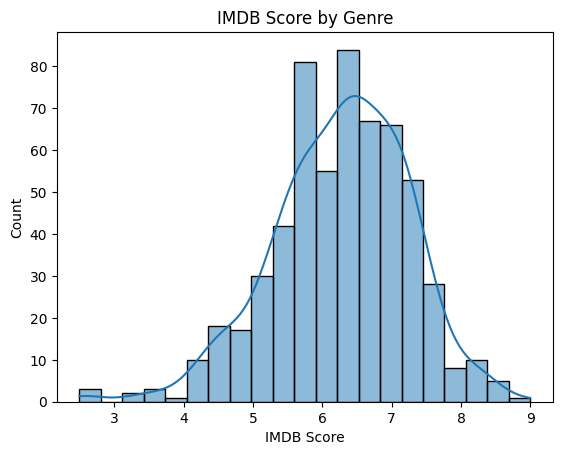

In [ ]:
#Histrogram Plot

#df_copy["IMDB Score"]: Targets the IMDB Score column.
#kde=True: Adds a KDE (Kernel Density Estimate) curve, which smooths out the distribution.
sns.histplot(df_copy["IMDB Score"],kde=True)
plt.title("IMDB Score by Genre")
plt.show()

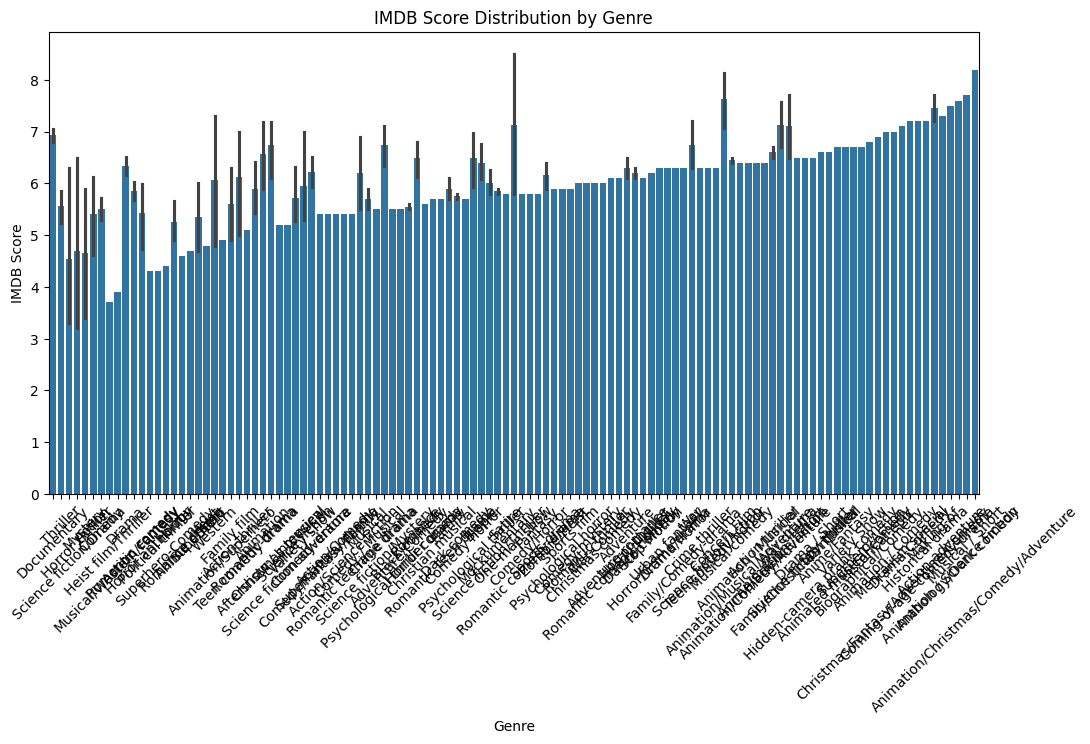

In [ ]:
#Line plot

#plt.plot(...): Creates a 2D line plot.
#df_copy["IMDB Score"].sort_values(): This provides the y-axis values.It sorts the IMDB scores in ascending order before plotting.
plt.figure(figsize=(12, 6))
sns.barplot(x="Genre",y="IMDB Score",data=df)

plt.xlabel("Genre")
plt.ylabel("IMDB Score")
plt.title("IMDB Score Distribution by Genre")
plt.xticks(rotation=45)
plt.show()

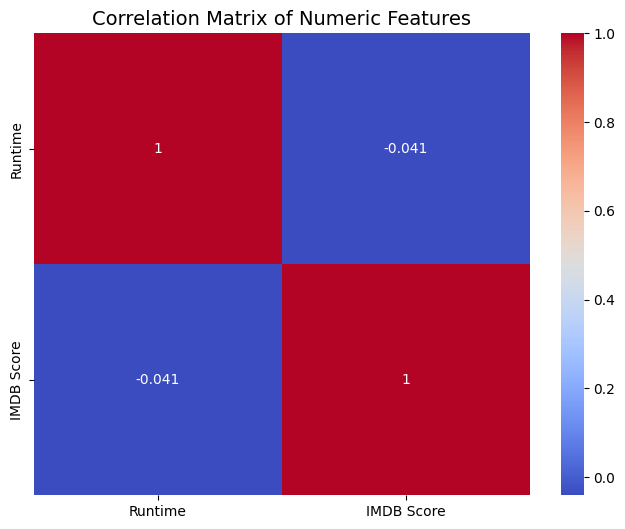

In [ ]:
#HeatMap

# Calculate correlation matrix for numeric columns only
correlation_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure with a larger size for better readability
plt.figure(figsize=(8, 6))

# Create a heatmap with custom color palette and annotations
sns.heatmap(
    correlation_matrix,          # Data to plot
    annot=True,                  # Show correlation values on heatmap
    cmap='coolwarm',             # Color map from blue (negative) to red (positive)
    )

# Add a descriptive title
plt.title("Correlation Matrix of Numeric Features", fontsize=14)

# Show the plot
plt.show()


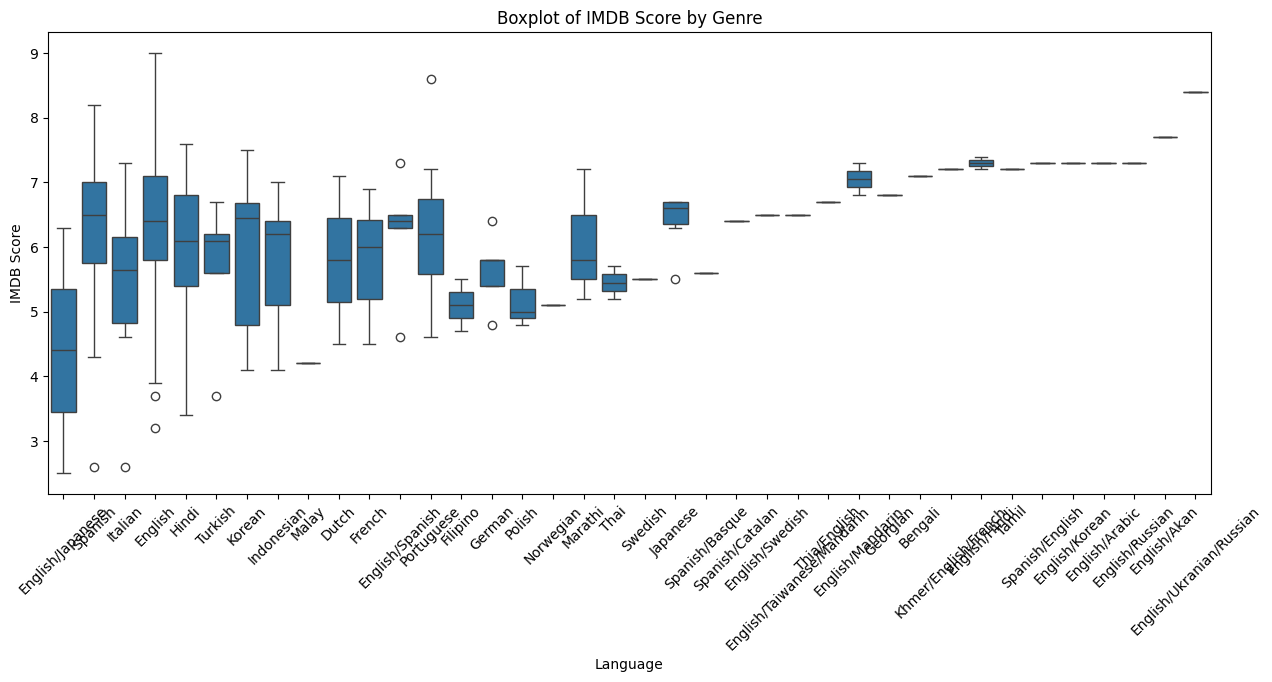

In [ ]:
#Boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(y="IMDB Score", x="Language", data=df)  #Boxplots show:Median (middle line in box)Interquartile range (IQR) (box edges) Whiskers (spread of data) Outliers (dots)
plt.xlabel("Language")
plt.ylabel("IMDB Score")
plt.title("Boxplot of IMDB Score by Genre")
plt.xticks(rotation=45)  # Optional: rotate genre labels for readability
plt.show()

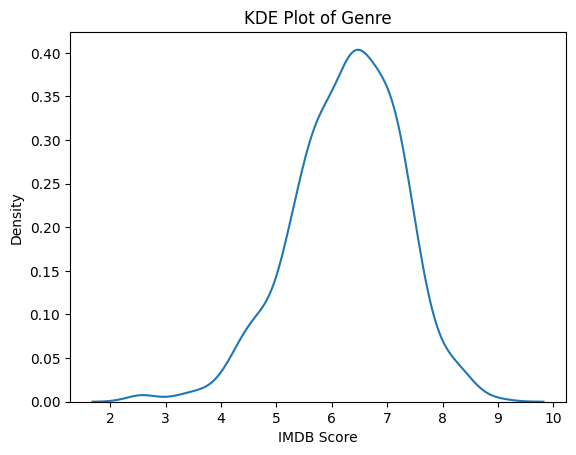

In [ ]:
#KDE plot
#sns.kdeplot(...): Plots the probability density function (PDF) of the IMDB scores.

sns.kdeplot(df["IMDB Score"])
plt.title("KDE Plot of Genre")
plt.xlabel("IMDB Score")
plt.show()

#Most movies have an IMDB score between 6 and 8, with a peak around 7.
#This is useful to understand the overall distribution of scores, regardless of genre.

#**Outlier Detection and Handling**

<Axes: xlabel='Language', ylabel='IMDB Score'>

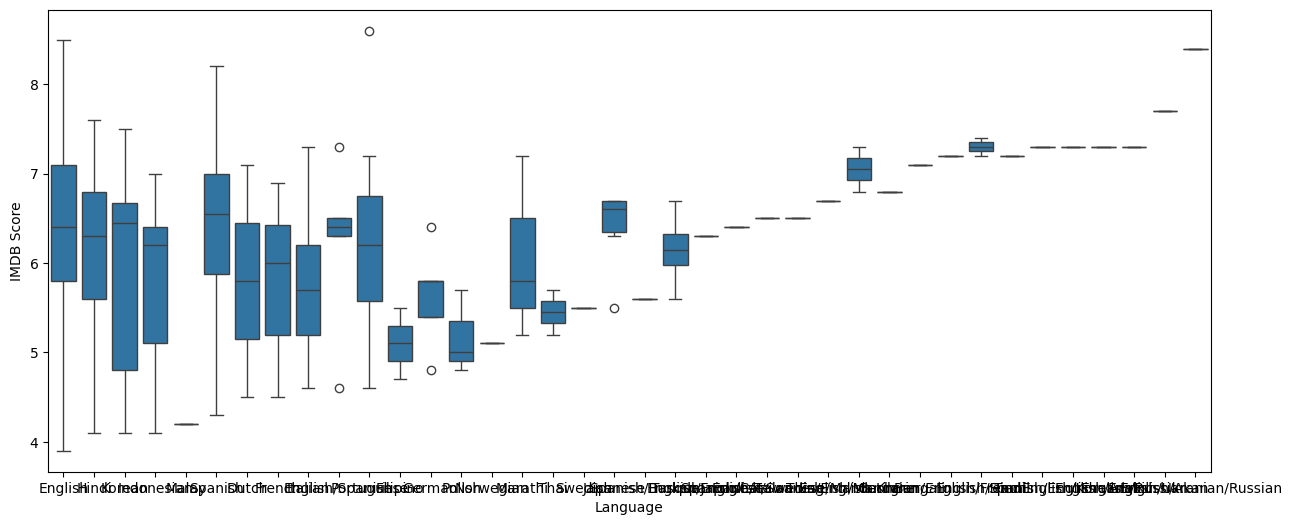

In [ ]:
q1 = df_copy["IMDB Score"].quantile(0.25)
q3 = df_copy["IMDB Score"].quantile(0.75)

iqr = q3-q1
upper_limit = q3+1.5*iqr
lower_limit = q1 - 1.5*iqr

df_copy = df_copy[(df_copy["IMDB Score"] < upper_limit) & (df_copy["IMDB Score"] > lower_limit)]  #This filters the dataset, removing outliers from IMDB Score.
#Only rows with values within the acceptable range are retained.
plt.figure(figsize=(15, 6))
sns.boxplot(y="IMDB Score", x="Language", data=df_copy)
#Any value above upper_limit or below lower_limit is considered an outlier.



#**Features Engineering**





In [ ]:
# Standardizing the 'IMDB Score' column and creating a new column 'Rating Category'
df_copy["Rating Category"] = (df_copy["IMDB Score"] - df_copy["IMDB Score"].mean()) / df_copy["IMDB Score"].std()

#df_copy["IMDB Score"].mean()
#Computes the mean (average) of all IMDB scores.

#df_copy["IMDB Score"].std()
#Computes the standard deviation of IMDB scores.
#Z= (x-u)/mew
​


<ipython-input-65-6758cec3aff6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["Rating Category"] = (df_copy["IMDB Score"] - df_copy["IMDB Score"].mean()) / df_copy["IMDB Score"].std()


In [ ]:
df_copy

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Rating Category
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English,-2.661039
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi,-2.440246
10,Searching for Sheela,Documentary,"April 22, 2021",58,4.1,English,-2.440246
11,The Call,Drama,"November 27, 2020",112,4.1,Korean,-2.440246
12,Whipped,Romantic comedy,"September 18, 2020",97,4.1,Indonesian,-2.440246
...,...,...,...,...,...,...,...
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2.306810
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2.306810
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2.306810
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2.417207


#**Summarize Findings**

#1. Most Netflix Original films have average IMDB scores between
   # 5 and 7.
#2. The mean and median IMDB score is about 6.3.
#3. There are some outliers with very low or very high scores.
#4. Missing values and duplicates were checked and handled.
#5.Numerical features show low correlation with each other.